# PotHole Detection using Transfer Learning

This Jupyter Notebook contains the code for training a Convolutional Neural Network (CNN) to detect potholes in images using transfer learning. 

The dataset used for this project contains two classes of images: `normal` and `potholes`. The `normal` class contains images of roads without potholes, while the `potholes` class contains images of roads with potholes. 

The CNN is built using the VGG16 architecture and is trained on the dataset using transfer learning. The last layer of the VGG16 model is replaced with a new dense layer with softmax activation function. The model is then trained on the dataset using the `ImageDataGenerator` class from Keras.

The accuracy of the model is evaluated using the `accuracy` metric and the `binary_crossentropy` loss function. The model is trained for 10 epochs and the accuracy values are plotted using `matplotlib`.

Finally, the model is tested on two sample images, one from the `normal` class and one from the `potholes` class, and the predicted class probabilities are printed.



In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'D:/Projects/PotHole Detection/images/'

## Displaying Images

This cell displays the first 5 images from the `normal` and `potholes` folders using the `PIL` and `IPython.display` libraries. The images are displayed using the `_Imgdis` function from `IPython.display` and are resized to 240x240 pixels. 

This cell is useful for visualizing the images in the dataset and verifying that they are being loaded correctly.


Working with 352 images
Image examples: 
1.jpg


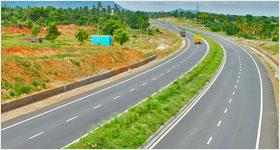

10.jpg


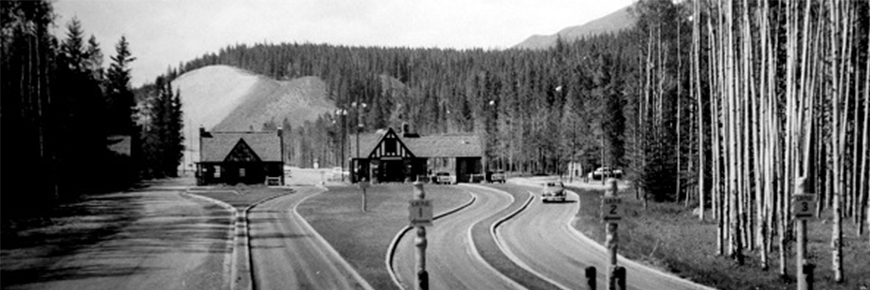

100.jpg


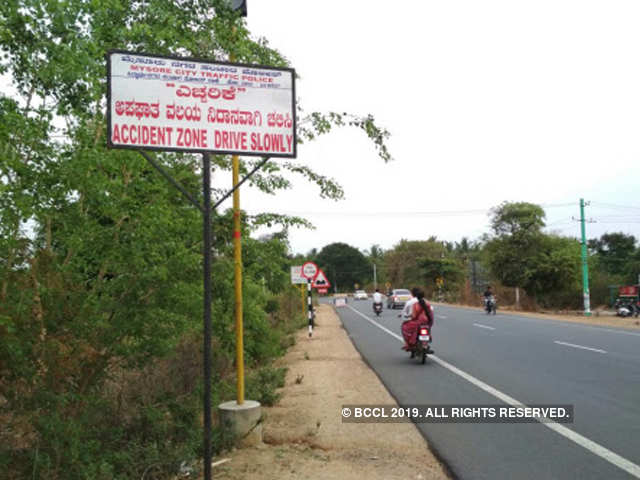

101.jpg


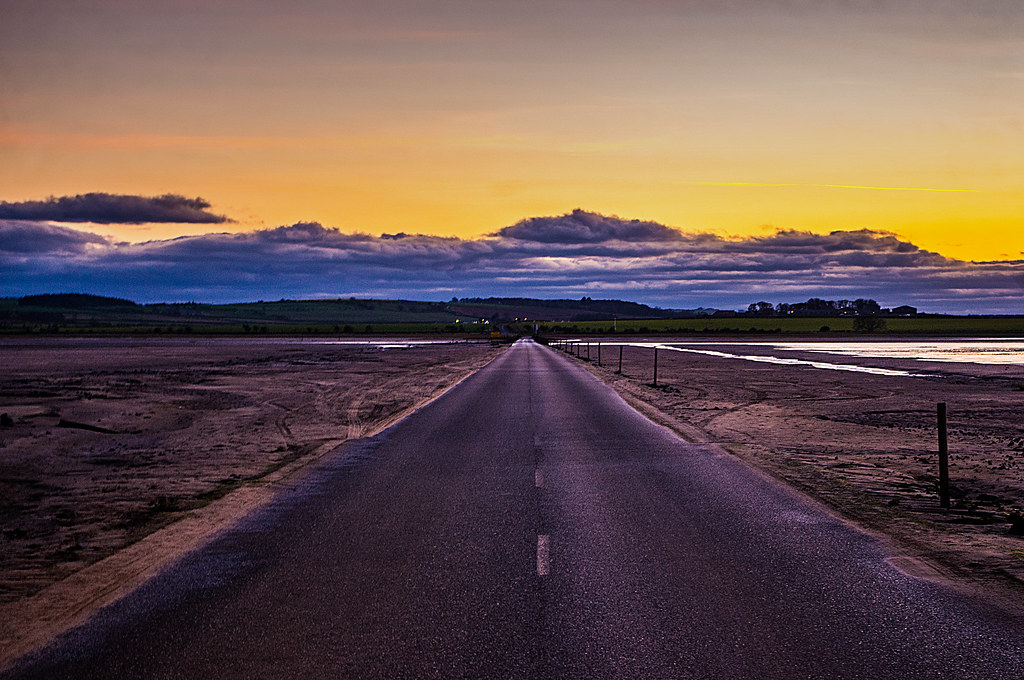

102.jpg


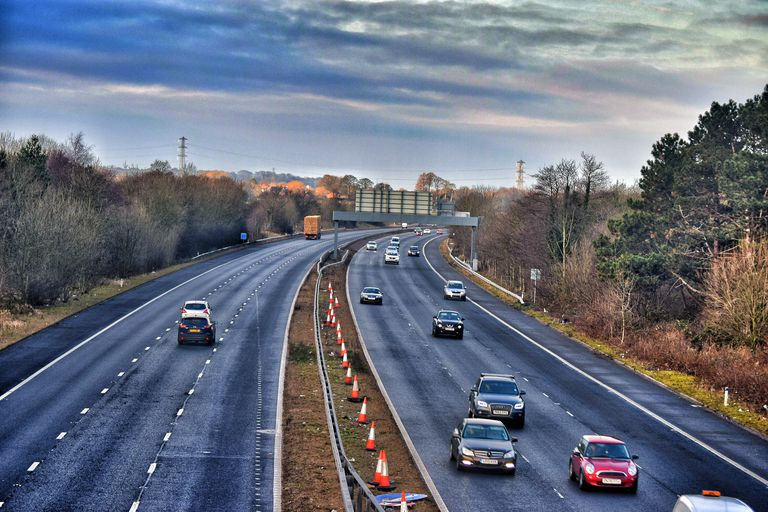

In [3]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
  
folder = train_path+'normal/'

only_normal_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(only_normal_files)))
print("Image examples: ")
for i in range(5):
    print(only_normal_files[i])
    display(_Imgdis(filename=folder + "/" + only_normal_files[i], width=240, height=240))
    

Working with 329 images
Image examples: 
1.jpg


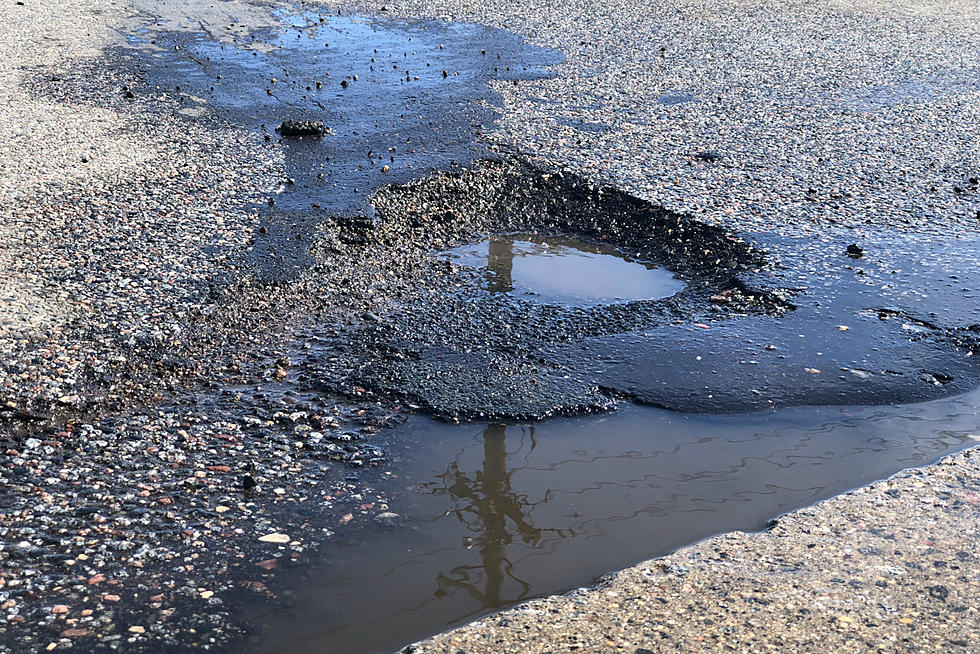

10.jpg


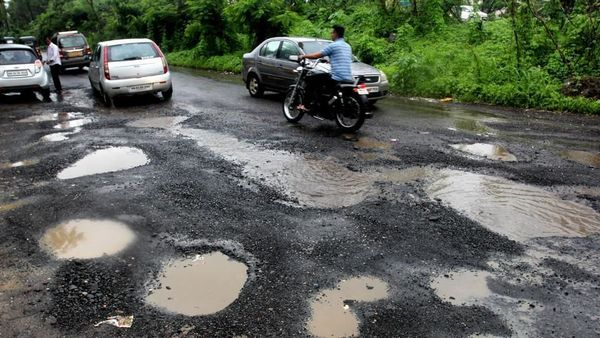

100.jpg


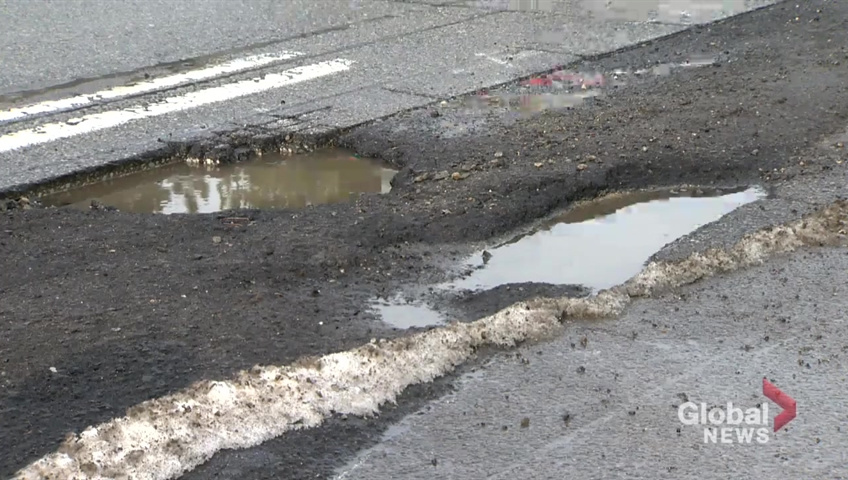

101.jpg


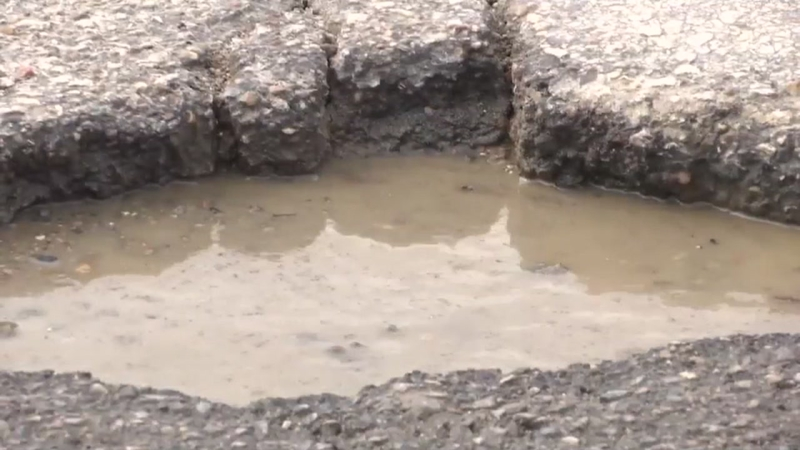

102.jpg


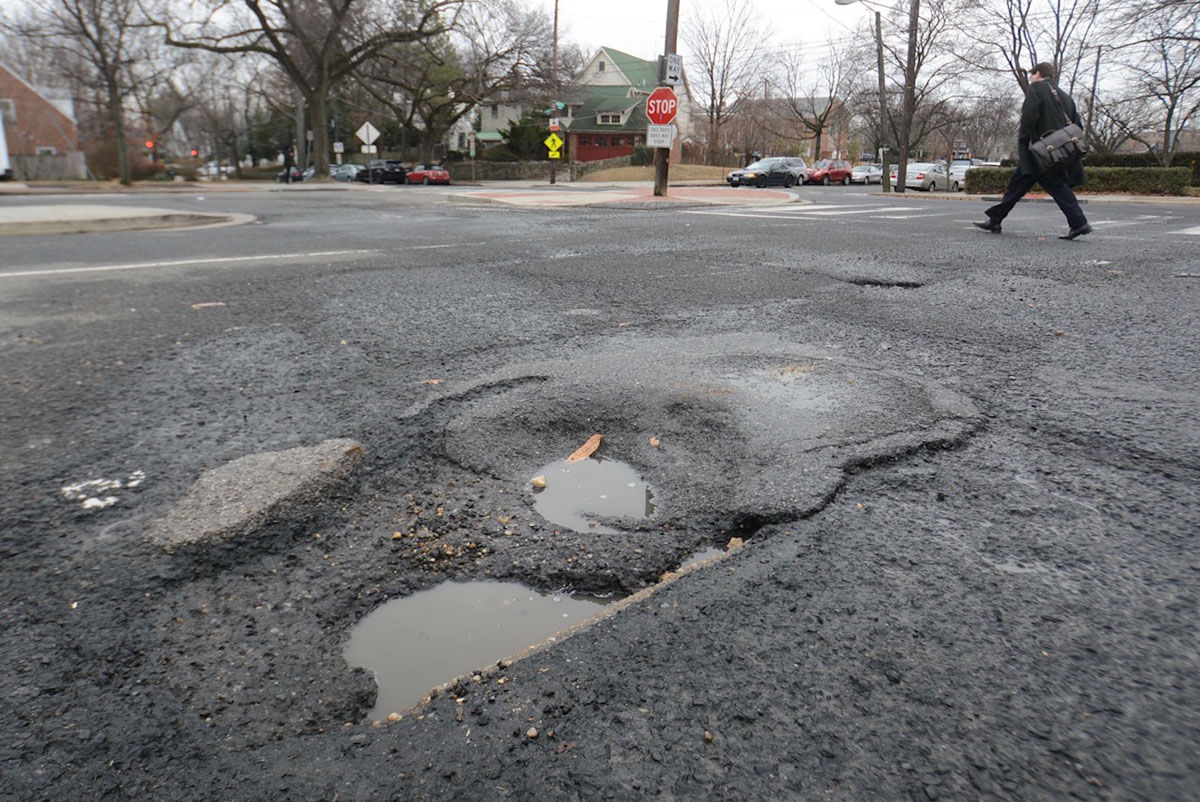

In [4]:
folder = train_path+'potholes/'

only_potholes_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(only_potholes_files)))
print("Image examples: ")
for i in range(5):
    print(only_potholes_files[i])
    display(_Imgdis(filename=folder + "/" + only_potholes_files[i], width=240, height=240))
    

## Defining the model

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.input
for layer in vgg.layers:
  layer.trainable = False

In [6]:
folders = glob('D:/Projects/PotHole Detection/images/*')
print(len(folders))

2


## Defining the model

This cell defines the CNN model architecture using the VGG16 architecture and transfer learning. The last layer of the VGG16 model is replaced with a new dense layer with softmax activation function. The `Model` class from Keras is used to define the model with the input shape of `(224, 224, 3)` and the output shape of `(2,)`, where `2` is the number of classes in the dataset. The `summary()` method is used to display the model architecture.


In [7]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [8]:
from keras import optimizers

adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 681 images belonging to 2 classes.


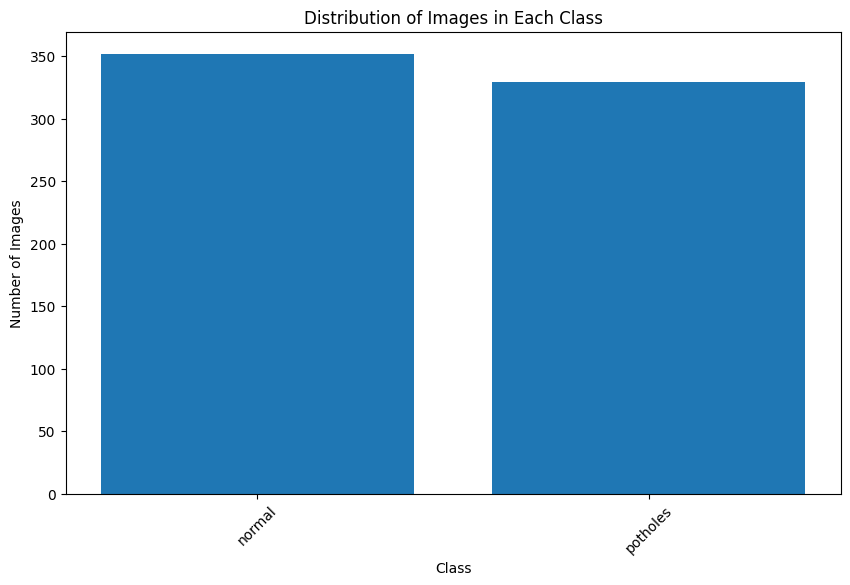

In [11]:
class_labels = os.listdir(train_path)
class_counts = []
for label in class_labels:
    class_dir = os.path.join(train_path, label)
    num_images = len(os.listdir(class_dir))
    class_counts.append(num_images)

plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Each Class')
plt.xticks(rotation=45)
plt.show()


## Training

In [18]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_169332\3176003636.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10
5/5 - 19s - loss: 2.4961 - accuracy: 0.7937 - 19s/epoch - 4s/step
Epoch 2/10
5/5 - 16s - loss: 0.5416 - accuracy: 0.9563 - 16s/epoch - 3s/step
Epoch 3/10
5/5 - 14s - loss: 0.7147 - accuracy: 0.9489 - 14s/epoch - 3s/step
Epoch 4/10
5/5 - 17s - loss: 0.9200 - accuracy: 0.9563 - 17s/epoch - 3s/step
Epoch 5/10
5/5 - 17s - loss: 0.9255 - accuracy: 0.9500 - 17s/epoch - 3s/step
Epoch 6/10
5/5 - 16s - loss: 1.0893 - accuracy: 0.9563 - 16s/epoch - 3s/step
Epoch 7/10
5/5 - 14s - loss: 0.5979 - accuracy: 0.9562 - 14s/epoch - 3s/step
Epoch 8/10
5/5 - 17s - loss: 0.4630 - accuracy: 0.9750 - 17s/epoch - 3s/step
Epoch 9/10
5/5 - 17s - loss: 0.4157 - accuracy: 0.9688 - 17s/epoch - 3s/step
Epoch 10/10
5/5 - 15s - loss: 0.7773 - accuracy: 0.9708 - 15s/epoch - 3s/step
Training completed in time:  0:02:47.293327


# Plotting Accuracy

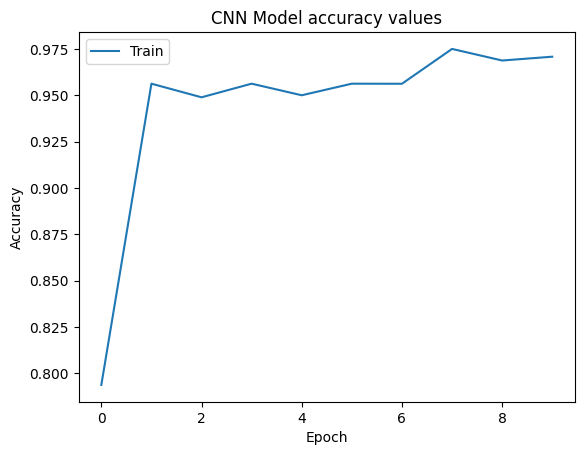

In [20]:
plt.plot(model_history.history['accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Testing the trained model

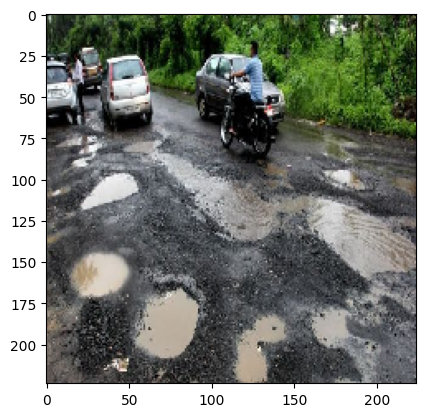

1/1 [==============================] - 0s 178ms/step
[[0. 1.]]


In [30]:
test_image = image.load_img("D:/Projects/PotHole Detection/images/potholes/10.jpg", target_size = (224, 224))
plt.imshow(test_image)
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = preprocess_input(test_image)
result = model.predict(test_image)
print(result)

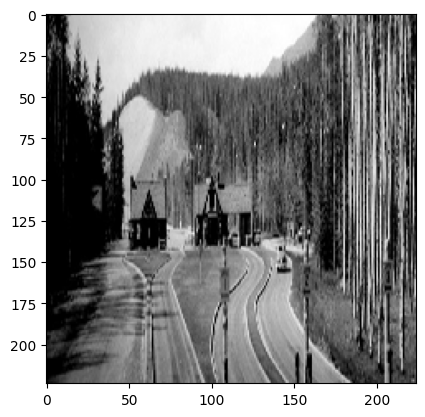

1/1 [==============================] - 0s 167ms/step
[[1. 0.]]


In [31]:
test_image = image.load_img("D:/Projects/PotHole Detection/images/normal/10.jpg", target_size = (224, 224))
plt.imshow(test_image)
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = preprocess_input(test_image)
result = model.predict(test_image)
print(result)